In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import networkx as nx
from networkx.algorithms.similarity import graph_edit_distance,optimize_graph_edit_distance

In [2]:
!pip install node2vec

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Graph Similarity Measure between nf_ToN_iot and nf_BoN_iot**

In [4]:
df_nf_ToN_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-ToN-IoT_chunks')

In [5]:
df_nf_ToN_iot_v1[df_nf_ToN_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,


In [6]:
# No Duplicates Found

In [7]:
df_nf_ToN_iot_v1.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,
0,192.168.1.195,63318,52.139.250.253,443,6,91.00,181,165,2,1,24,327,0
1,192.168.1.79,57442,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0
2,192.168.1.79,57452,239.255.255.250,15600,17,0.00,63,0,1,0,0,0,0
3,192.168.1.193,138,192.168.1.255,138,17,10.16,472,0,2,0,0,0,0
4,192.168.1.79,51989,192.168.1.255,15600,17,0.00,63,0,1,0,0,0,0


In [8]:
df_nf_ToN_iot_v1.shape

(846951, 13)

In [9]:
df_nf_BoT_iot_v1=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-BoT-IoT_chunks')

In [10]:
df_nf_BoT_iot_v1[df_nf_BoT_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS,Label
__null_dask_index__,,,,,,,,,,,,,


**No Duplicates Found**

In [11]:
df_nf_BoT_iot_v1.shape

(510941, 13)

In [12]:
df_nf_BoT_iot_v1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [13]:
df_nf_BoT_iot_v1=df_nf_BoT_iot_v1[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [14]:
#Excluding labels for df_nf_BoT_iot_v1

In [15]:
df_nf_ToN_iot_v1.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'Label'],
      dtype='object')

In [16]:
#Excluding labels for df_nf_ToN_iot_v1

In [17]:
df_nf_ToN_iot_v1=df_nf_ToN_iot_v1[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

In [18]:
df_nf_ToN_iot_v1[df_nf_ToN_iot_v1.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,,,


In [19]:
df_NF_ToN_IoT_v2=pd.read_parquet('/content/gdrive/MyDrive/csci-e-599a-2024-cybersecurity/data/parquet/netflow/ip_port/NF-ToN-IoT-v2_chunks')

df_NF_ToN_IoT_v2=df_NF_ToN_IoT_v2[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS',
       'TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS']]

df_NF_ToN_IoT_v2[df_NF_ToN_IoT_v2.duplicated()]

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,OUT_BYTES,IN_PKTS,OUT_PKTS,TCP_FLAGS,FLOW_DURATION_MILLISECONDS
__null_dask_index__,,,,,,,,,,,,


In [20]:
G1 = nx.from_pandas_edgelist(df_nf_ToN_iot_v1, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph(),edge_attr=True)

In [21]:
G2 = nx.from_pandas_edgelist(df_nf_BoT_iot_v1, 'IPV4_SRC_ADDR', 'IPV4_DST_ADDR', create_using=nx.DiGraph(),edge_attr=True)

**Graph Edit Distance**

In [22]:
import sys
sys.setrecursionlimit(10000)

In [23]:
#ged=graph_edit_distance(G1, G2, edge_match=lambda x, y: x.get('PROTOCOL') == y.get('PROTOCOL') and x.get('L7_PROTO') == y.get('L7_PROTO')
 #                        and x.get('IN_BYTES')==y.get('IN_BYTES') and x.get('OUT_BYTES')==y.get('OUT_BYTES') and x.get('IN_PKTS')==y.get('IN_PKTS')
  #                      and x.get('OUT_PKTS')==y.get('OUT_PKTS') and x.get('TCP_FLAGS')==y.get('TCP_FLAGS') and x.get('FLOW_DURATION_MILLISECONDS')==y.get('FLOW_DURATION_MILLISECONDS')
                       #)
#print("Graph Edit Distance:", ged)

Failing due to Memory Issue

**Finding Cosine Similarity for Embeddings Generated from Node2Vec Between Two Graph Set**


1.   df_nf_ToN_iot_v1 and df_nf_BoT_iot_v1
2.   df_nf_ToN_iot_v1 and df_nf_UNSW_NB15





In [24]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.metrics.pairwise import cosine_similarity


# Train edge2vec model for graph 1
node2vec_model1 = Node2Vec(G1, dimensions=64, walk_length=30, num_walks=200, workers=4)
embeddings1 = node2vec_model1.fit().wv.vectors

# Train edge2vec model for graph 2
node2vec_model2 = Node2Vec(G2, dimensions=64, walk_length=30, num_walks=200, workers=4)
embeddings2 = node2vec_model2.fit().wv.vectors


# Reshape embeddings for cosine similarity calculation
embeddings1 = embeddings1.reshape(-1, embeddings1.shape[1])
embeddings2 = embeddings2.reshape(-1, embeddings2.shape[1])

print(embeddings1.shape)
print(embeddings2.shape)

# Calculate cosine similarity
cosine_sim = cosine_similarity(embeddings1, embeddings2)
average_similarity = np.mean(cosine_sim)


#print(embeddings1)

# Print the cosine similarity matrix
print(cosine_sim)

print("average_similarity",average_similarity)


Computing transition probabilities:   0%|          | 0/1501 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/131 [00:00<?, ?it/s]

(1501, 64)
(131, 64)
[[0.16643317 0.08329682 0.08740109 ... 0.06234899 0.07450157 0.09539188]
 [0.62375915 0.6782108  0.65532064 ... 0.13070093 0.65555495 0.625962  ]
 [0.5059482  0.52191705 0.55534863 ... 0.02296738 0.4950623  0.50667876]
 ...
 [0.56618017 0.575347   0.5967468  ... 0.02255115 0.5498168  0.56203496]
 [0.5706724  0.5744109  0.59963953 ... 0.00847446 0.55487305 0.5645812 ]
 [0.5100058  0.5210455  0.54235697 ... 0.01556964 0.49785998 0.5097741 ]]
average_similarity 0.3673391


**Node Drop Testing using node2vec**

In [25]:
import networkx as nx
from node2vec import Node2Vec

# Precompute probabilities and generate walks
node2vec = Node2Vec(G1, dimensions=64, walk_length=30, num_walks=200, workers=4)

## if d_graph is big enough to fit in the memory, pass temp_folder which has enough disk space
# Note: It will trigger "sharedmem" in Parallel, which will be slow on smaller graphs
#node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4, temp_folder="/mnt/tmp_data")

# Embed
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)


Computing transition probabilities:   0%|          | 0/1501 [00:00<?, ?it/s]

In [26]:
embeddings1 = model.wv.vectors

In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


embeddings_originalgraph = embeddings1.reshape(-1, embeddings1.shape[1])

# Define the percentage of nodes to drop
percentage_to_drop = np.arange(0.1, 1.0, 0.1)  # from 10% to 90% in steps of 10%

# Store results
embeddings = {}

# Generate embeddings and plot
for percentage in percentage_to_drop:
    # Create a copy of the original graph
    G_copy = G1.copy()

    # Calculate the number of nodes to drop
    num_nodes_to_drop = int(len(G_copy.nodes) * percentage)

    # Get a list of nodes
    nodes_to_drop = list(G_copy.nodes())

    # Shuffle the list of nodes randomly
    np.random.shuffle(nodes_to_drop)

    # Select the first num_nodes_to_drop nodes from the shuffled list
    nodes_to_drop = nodes_to_drop[:num_nodes_to_drop]

    # Remove the selected nodes from the graph
    G_copy.remove_nodes_from(nodes_to_drop)

    # Generate node embeddings using Node2Vec
    node2vec_model = Node2Vec(G_copy, dimensions=64, walk_length=30, num_walks=200, workers=4)
    model = node2vec_model.fit(window=10, min_count=1, batch_words=4)
    embeddings_graph=model.wv.vectors
    embeddings_drop=embeddings_graph.reshape(-1, embeddings_graph.shape[1])

    #Calculate cosine similarity between dropped nodes and original graph

    cosine_sim = cosine_similarity(embeddings_drop, embeddings_originalgraph)
    average_similarity = np.mean(cosine_sim)

    #Store the cosine average similarity in a dictionary
    embeddings[percentage] = average_similarity

Computing transition probabilities:   0%|          | 0/1351 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/1201 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/1051 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/901 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/751 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/601 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/451 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/301 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/151 [00:00<?, ?it/s]

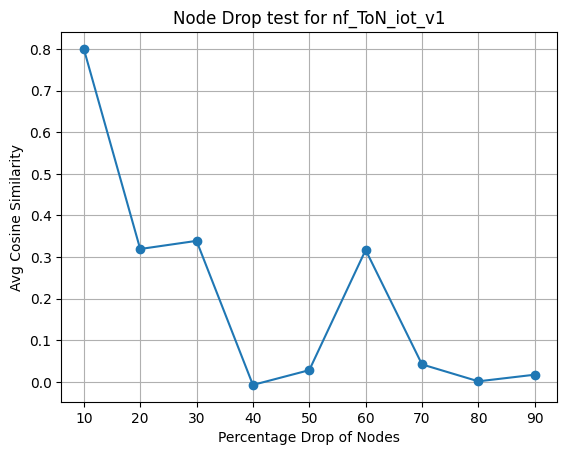

In [28]:
embeddings = {key * 100: value for key, value in embeddings.items()}


# Extract x and y values from the dictionary
x_values = list(embeddings.keys())
y_values = list(embeddings.values())

# Plot the line graph
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Percentage Drop of Nodes')
plt.ylabel('Avg Cosine Similarity')
plt.title('Node Drop test for nf_ToN_iot_v1')

# Show the plot
plt.grid(True)
plt.show()

**Node Drop Test for df_nf_BoT_iot_v1**

In [29]:
# Precompute probabilities and generate walks
node2vec = Node2Vec(G2, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Embed
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)


Computing transition probabilities:   0%|          | 0/131 [00:00<?, ?it/s]

In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

embeddings1 = model.wv.vectors
embeddings_originalgraph = embeddings1.reshape(-1, embeddings1.shape[1])

# Define the percentage of nodes to drop
percentage_to_drop = np.arange(0.1, 1.0, 0.1)  # from 10% to 90% in steps of 10%

# Store results
embeddings = {}

# Generate embeddings and plot
for percentage in percentage_to_drop:
    # Create a copy of the original graph
    G_copy = G2.copy()

    # Calculate the number of nodes to drop
    num_nodes_to_drop = int(len(G_copy.nodes) * percentage)

    # Get a list of nodes
    nodes_to_drop = list(G_copy.nodes())

    # Shuffle the list of nodes randomly
    np.random.shuffle(nodes_to_drop)

    # Select the first num_nodes_to_drop nodes from the shuffled list
    nodes_to_drop = nodes_to_drop[:num_nodes_to_drop]

    # Remove the selected nodes from the graph
    G_copy.remove_nodes_from(nodes_to_drop)

    # Generate node embeddings using Node2Vec
    node2vec_model = Node2Vec(G_copy, dimensions=64, walk_length=30, num_walks=200, workers=4)
    model = node2vec_model.fit(window=10, min_count=1, batch_words=4)
    embeddings_graph=model.wv.vectors
    embeddings_drop=embeddings_graph.reshape(-1, embeddings_graph.shape[1])

    #Calculate cosine similarity between dropped nodes and original graph

    cosine_sim = cosine_similarity(embeddings_drop, embeddings_originalgraph)
    average_similarity = np.mean(cosine_sim)

    #Store the cosine average similarity in a dictionary
    embeddings[percentage] = average_similarity

Computing transition probabilities:   0%|          | 0/118 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/105 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/92 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/79 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/66 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/53 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/40 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/27 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/14 [00:00<?, ?it/s]

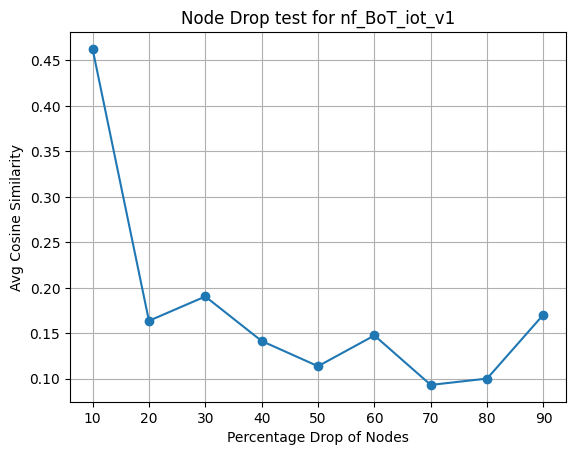

In [31]:
embeddings = {key * 100: value for key, value in embeddings.items()}

# Extract x and y values from the dictionary
x_values = list(embeddings.keys())
y_values = list(embeddings.values())

# Plot the line graph
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Percentage Drop of Nodes')
plt.ylabel('Avg Cosine Similarity')
plt.title('Node Drop test for nf_BoT_iot_v1')

# Show the plot
plt.grid(True)
plt.show()